In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
import pandas as pd
import keras

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import visualkeras
%matplotlib inline

In [1]:
rootdir= 'C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset' 
# the path of the dataset
classes = ['covid','normal','pneumonia'] # the classes of the dataset

for i in classes:
    
    os.makedirs(rootdir +'/train1/' + i) # open a new folder for training dataset

    os.makedirs(rootdir +'/validation1/' + i) # open a new folder for validation dataset
    
    os.makedirs(rootdir +'/test1/' + i) # open a new folder for test dataset

    source = rootdir + '/' + i # save the original path

    # randomly copy the data from the original path to the file paths by dividing them as 
    # 33% training 33% test data and 33% validation data equally
    # the reason for equal entity for each set is to train and test SVM 
    # the input size for each set should be the same for SVM, otherwise it will give error about dataset input size
    
    allFileNames = os.listdir(source) # list the files and save it

    np.random.shuffle(allFileNames) # randomly choose the files
    
    test_ratio = 0.33 # first %33 for test set
    validation_ratio = 0.5 # divide the rest in 2 (%33, %33)
    

    FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
    
    # define the ratio to test folder
    
    train_FileNames, validation_FileNames = np.split(np.array(FileNames),
                                                      [int(len(FileNames)* (1 - validation_ratio))])
    
    # define the ratio to training and validation folders
    
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()] # split the data and fill in the training set
    validation_FileNames = [source+'/' + name for name in validation_FileNames.tolist()] # split the data and fill in the validation set
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()] # split the data and fill in the test set

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/train/' + i)
    # copy randomly chosen data inside the folder
    
    for name in validation_FileNames:
        shutil.copy(name, rootdir +'/validation/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/test/' + i)

NameError: name 'os' is not defined

In [3]:
IMG_SIZE = 128 # the size of the input image to be processed
BATCH_SIZE = 16 # group size to be processed each time

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,width_shift_range=0.1,
                                   height_shift_range=0.1,rescale=1./255,
                                shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                        rescale=1./255)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rescale=1./255)

# With image datagenerator, we preprocess (normalize as 1/255) and augment the data 

In [6]:
train_generator = train_datagen.flow_from_directory(directory=
'C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/train1',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

# We call our data thanks to the tensorflow library and apply the parameters with the values in the generator.

validation_generator = validation_datagen.flow_from_directory(directory=
'C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/validation1',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

test_generator = test_datagen.flow_from_directory(directory=
'C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/test1',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

Found 1512 images belonging to 3 classes.
Found 1512 images belonging to 3 classes.
Found 1512 images belonging to 3 classes.


CUSTOM CNN

In [1]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout,  Dense
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization

In [4]:
#initialize the model
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))


# Conv2D(filter value, (kernel size), activation function, rehsape the data as indicated before, padding)
# padding: "same" results in padding with zeros evenly to the left/right or up/down of the input.
# relu: The rectified linear activation function or ReLU for short is a piecewise linear function that will output the 
# input directly if it is positive, otherwise, it will output zero.

# Batch normalization applies a transformation that maintains 
# the mean output close to 0 and the output standard deviation close to 1 (fluctuates around +/- 1).

# MaxPool: Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window 
# (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

# Drop-Out: Dropout is a technique where randomly selected neurons are ignored during training. (reduces the weight of model.)


# Conv Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

# Conv Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

# Conv Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

# Conv Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

# Conv Block 6
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

# FC layers
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(3, activation='softmax'))


# Flatten: Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
# It helps in making the models trained seamlessly where the imports 
# to the trained model can be handled easily by using keras flatten.


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

# categorical crossentropy: Categorical cross-entropy is used when true labels are one-hot encoded, for example, we have the following 
# true values for 3-class classification problem [1,0,0] , [0,1,0] and [0,0,1].

# adam optimizer: Adam optimization is a stochastic gradient descent method that is 
# based on adaptive estimation of first-order and second-order moments.

# categorical accuracy: Categorical Accuracy calculates the percentage of predicted values 
# (yPred) that match with actual values (yTrue) for one-hot labels.

In [8]:
model.summary() # label demonstration

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

In [415]:
history = model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20)

Epoch 1/20
95/95 [==============================] - 209s 2s/step - loss: 2.8947 - categorical_accuracy: 0.6052 - val_loss: 0.8326 - val_categorical_accuracy: 0.5476
Epoch 2/20
95/95 [==============================] - 207s 2s/step - loss: 0.6227 - categorical_accuracy: 0.7659 - val_loss: 1.7674 - val_categorical_accuracy: 0.4854
Epoch 3/20
95/95 [==============================] - 206s 2s/step - loss: 0.5635 - categorical_accuracy: 0.8049 - val_loss: 0.8478 - val_categorical_accuracy: 0.6237
Epoch 4/20
95/95 [==============================] - 206s 2s/step - loss: 0.4922 - categorical_accuracy: 0.8194 - val_loss: 1.1280 - val_categorical_accuracy: 0.5033
Epoch 5/20
95/95 [==============================] - 207s 2s/step - loss: 0.4924 - categorical_accuracy: 0.8228 - val_loss: 1.1156 - val_categorical_accuracy: 0.5807
Epoch 6/20
95/95 [==============================] - 206s 2s/step - loss: 0.4474 - categorical_accuracy: 0.8505 - val_loss: 0.7858 - val_categorical_accuracy: 0.7573
Epoch 7/20

In [85]:
model.save('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN1') # save model as a file to call back
np.save('HDA_Model_CNN1.npy',history.history) # save the weights as a numpy array

INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN1\assets


INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN1\assets


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


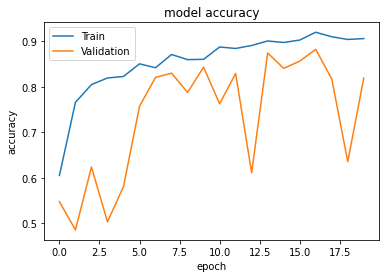

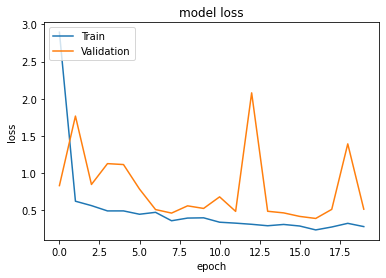

In [9]:
from matplotlib import pyplot as plt

history = keras.models.load_model('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models_CNN/Custom_CNN') #recall the model
hist=np.load('HDA_Model_CNN.npy',allow_pickle='TRUE').item() #load the weights again
print(hist.keys()) # display the parameters of the weights


# summarize history for accuracy
plt.plot(hist['categorical_accuracy'])
plt.plot(hist['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

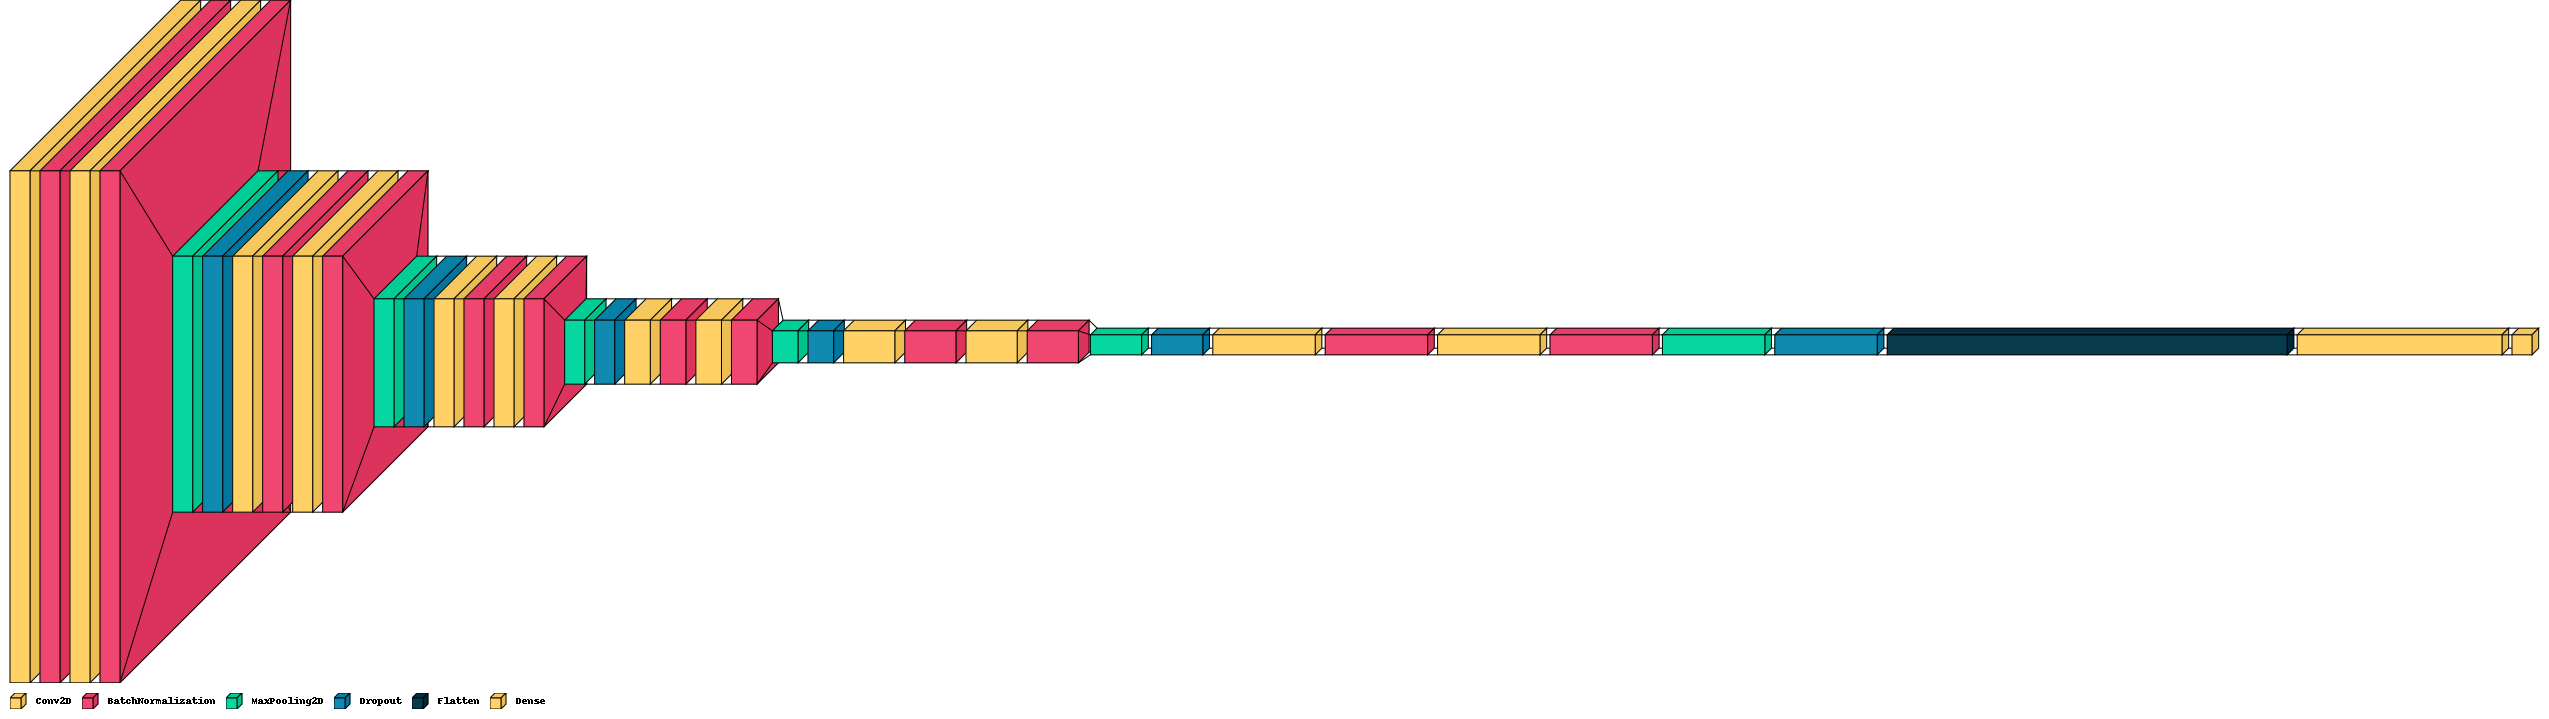

In [11]:
visualkeras.layered_view(history, legend=True) #visually display the model

In [153]:
#evaluate the model with each generator

history.evaluate(train_generator)
history.evaluate(validation_generator)
history.evaluate(test_generator)

95/95 [==============================] - 47s 499ms/step - loss: 0.4674 - categorical_accuracy: 0.8261


[0.4673979878425598, 0.8260582089424133]

CUSTOM CNN WITH ATTENTION LAYER

In [22]:
#there is a common code block but we have modified with different pooling methods (not jus one) and density layers

class ChannelAttention(tf.keras.layers.Layer): # new layer class
      def __init__(self, filters): # import the filter size as an input
        super(ChannelAttention, self).__init__()
        self.filters = filters #define a filter with indicated sizes

        def build(self, input_shape): #construct the model with density layers
            self.shared_layer_one = tf.keras.layers.Dense(self.filters, #filter size is called for density
                             activation='relu')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             activation='relu')


        def call(self, inputs):
            # lay-out of the layers for identifying the marks to get attention on
            #to do that, we have used pooling method and differentiate each class via images
            avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = MaxPooling2D(pool_size=(2, 2))(inputs)
            max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = shared_layer_one(max_pool)
            max_pool = shared_layer_two(max_pool)


            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention) #act function found with a try-out, 
            #softmax was less succesful
            
            return tf.keras.layers.Multiply()([inputs, attention])
        
# Now, the difference btw classes should be identified

In [23]:
# In here, we also modified a common block by understanding the method
# This part recognizes the identified part by its location (height and weight: spatial)

class Sattention(tf.keras.layers.Layer):
      def __init__(self, kernel_size):
        super(Sattention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 3,
                    kernel_size=self.kernel_size,
                    padding='same',
                    activation='sigmoid')

        def call(self, inputs):
            
            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)
            
            attention = self.conv2d(attention)
            
            attention = self.conv2d(attention)



            return tf.keras.layers.multiply([inputs, attention]) 

In [24]:
model0 = Sequential()

# Conv Block 1
model0.add(Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

model0.add(Dropout(0.5))

# Conv Block 2
model0.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

model0.add(Dropout(0.5))


# Conv Block 3

model0.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

model0.add(Dropout(0.5))

# Conv Block 4
model0.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

model0.add(Dropout(0.5))

# Conv Block 5
model0.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model0.add(Dropout(0.5))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

# Conv Block 6
model0.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model0.add(tf.keras.layers.GlobalAveragePooling2D())

model0.add(Dropout(0.5))

model0.add(ChannelAttention(4096))
model0.add(Sattention(7))

# FC layers
model0.add(Flatten())
model0.add(Dense(2048, activation='relu'))
model0.add(Dense(3, activation='softmax'))


model0.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

In [16]:
model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_15 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

In [423]:
history0 = model0.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20)

Epoch 1/20
95/95 [==============================] - 210s 2s/step - loss: 2.7688 - categorical_accuracy: 0.5833 - val_loss: 2.4318 - val_categorical_accuracy: 0.3333
Epoch 2/20
95/95 [==============================] - 211s 2s/step - loss: 0.6653 - categorical_accuracy: 0.7414 - val_loss: 1.7871 - val_categorical_accuracy: 0.3333
Epoch 3/20
95/95 [==============================] - 212s 2s/step - loss: 0.5671 - categorical_accuracy: 0.7798 - val_loss: 1.2213 - val_categorical_accuracy: 0.5000
Epoch 4/20
95/95 [==============================] - 229s 2s/step - loss: 0.5652 - categorical_accuracy: 0.7937 - val_loss: 1.0536 - val_categorical_accuracy: 0.4967
Epoch 5/20
95/95 [==============================] - 213s 2s/step - loss: 0.4941 - categorical_accuracy: 0.8042 - val_loss: 3.0440 - val_categorical_accuracy: 0.3399
Epoch 6/20
95/95 [==============================] - 215s 2s/step - loss: 0.5281 - categorical_accuracy: 0.8075 - val_loss: 0.7971 - val_categorical_accuracy: 0.5734
Epoch 7/20

In [424]:
model0.save('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN_Attention')
np.save('HDA_Model_Attention.npy',history0.history)

INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN_Attention\assets


INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/Custom_CNN_Attention\assets


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


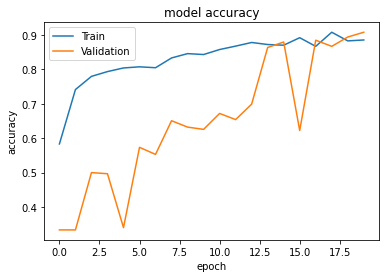

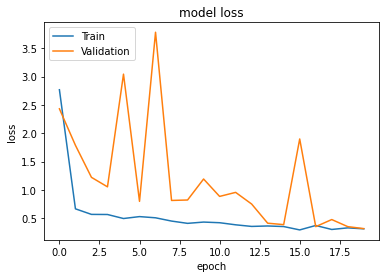

In [10]:
from matplotlib import pyplot as plt

history0 = keras.models.load_model('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models_CNN/Custom_CNN_Attention')
hist0=np.load('HDA_Model_Attention.npy',allow_pickle='TRUE').item()
print(hist0.keys())

plt.plot(hist0['categorical_accuracy'])
plt.plot(hist0['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist0['loss'])
plt.plot(hist0['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

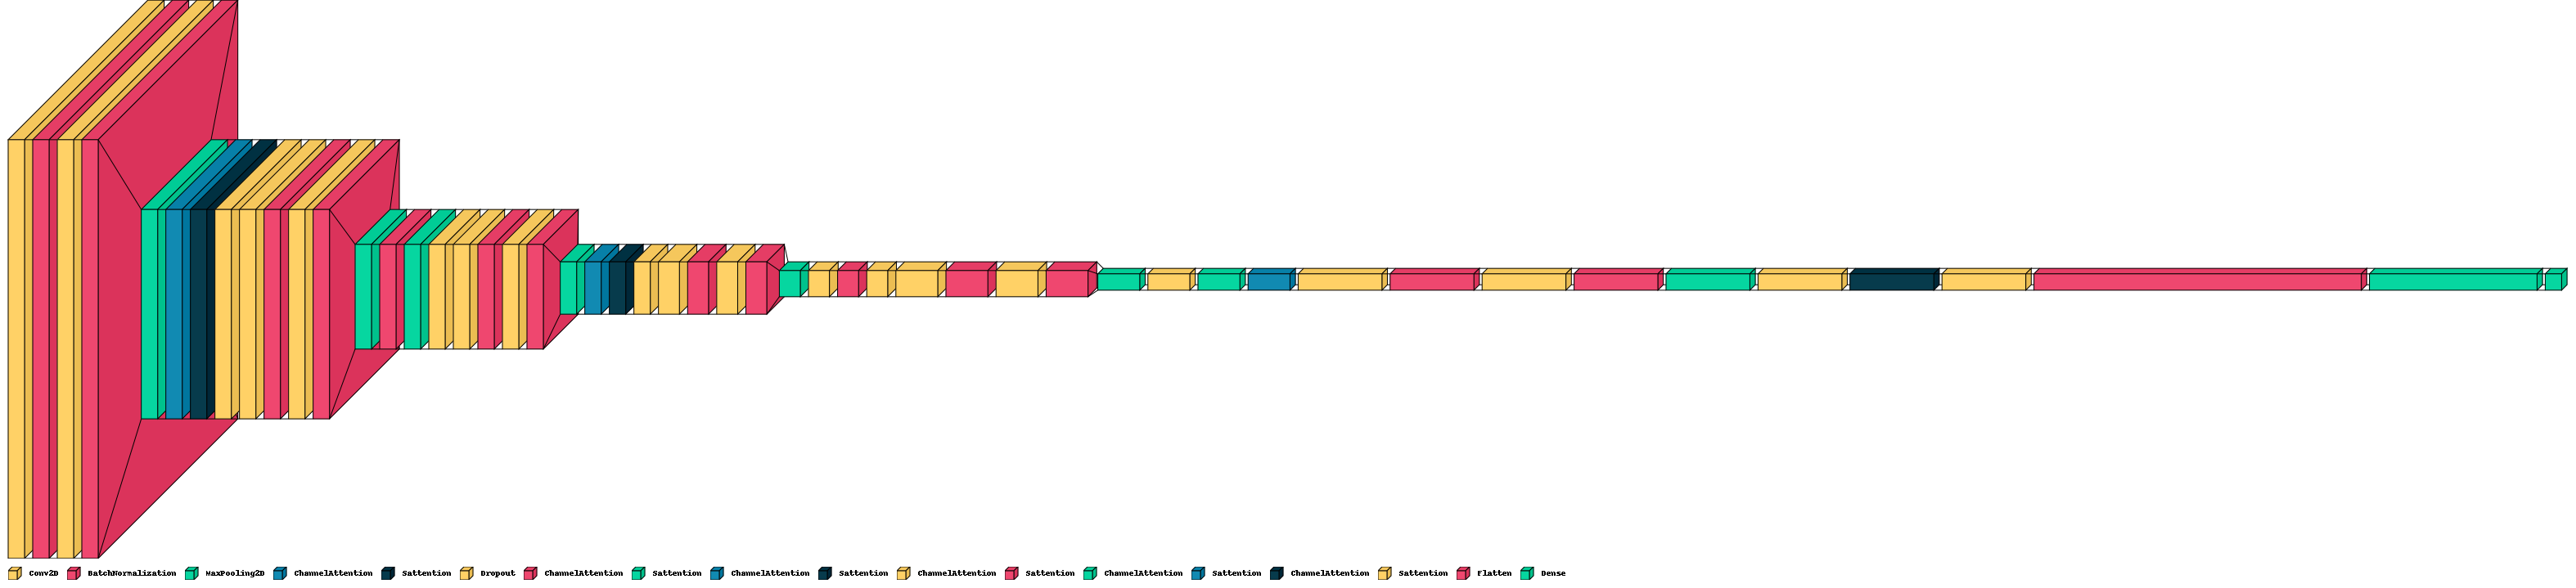

In [19]:
visualkeras.layered_view(history0, legend=True)

In [154]:
history0.evaluate(train_generator)
history0.evaluate(validation_generator)
history0.evaluate(test_generator)

95/95 [==============================] - 32s 334ms/step - loss: 0.2914 - categorical_accuracy: 0.9167


[0.2914336919784546, 0.9166666865348816]

PRE-TRAINED CNNs

In [78]:
from tensorflow.keras.models import Model

In [25]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top=False,
                                                  input_shape=(IMG_SIZE,IMG_SIZE,3)) # apply the same parameters
# call a Keras model from the library

headmodel = base_model.output # define the model as the output of pre-trained model
#fully connected layer
headmodel = Flatten(name ='Flatten')(headmodel) # normalize the data
headmodel = Dense(2048)(headmodel)
headmodel = Dense(3, activation = 'softmax')(headmodel)

model1 = Model(inputs = base_model.input, outputs = headmodel) # define the final model

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

NameError: name 'Model' is not defined

In [80]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [22]:
history1 = model1.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20)

Epoch 1/20
95/95 [==============================] - 318s 3s/step - loss: 5.9915 - categorical_accuracy: 0.6204 - val_loss: 1.1083 - val_categorical_accuracy: 0.3333
Epoch 2/20
95/95 [==============================] - 290s 3s/step - loss: 1.4178 - categorical_accuracy: 0.6766 - val_loss: 1.1107 - val_categorical_accuracy: 0.3333
Epoch 3/20
95/95 [==============================] - 342s 4s/step - loss: 0.8145 - categorical_accuracy: 0.7341 - val_loss: 1.1226 - val_categorical_accuracy: 0.3333
Epoch 4/20
95/95 [==============================] - 280s 3s/step - loss: 0.9068 - categorical_accuracy: 0.7381 - val_loss: 1.1427 - val_categorical_accuracy: 0.3333
Epoch 5/20
95/95 [==============================] - 341s 4s/step - loss: 0.7651 - categorical_accuracy: 0.7612 - val_loss: 1.1627 - val_categorical_accuracy: 0.3333
Epoch 6/20
95/95 [==============================] - 278s 3s/step - loss: 1.2116 - categorical_accuracy: 0.7209 - val_loss: 1.1353 - val_categorical_accuracy: 0.3545
Epoch 7/20

In [23]:
model1.save('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/ResNet50')

INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/ResNet50\assets


INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/ResNet50\assets


In [24]:
np.save('HDA_ResNet50.npy',history1.history)

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


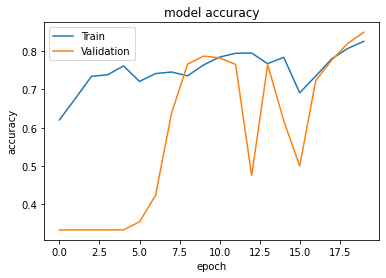

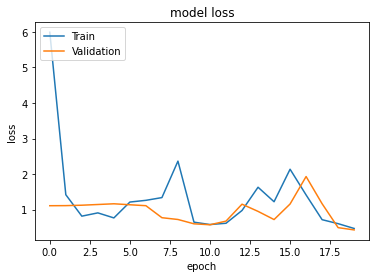

In [11]:
from matplotlib import pyplot as plt

history1 = keras.models.load_model('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models_CNN/ResNet50')
hist1=np.load('HDA_ResNet50.npy',allow_pickle='TRUE').item()
print(hist1.keys())

plt.plot(hist1['categorical_accuracy'])
plt.plot(hist1['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

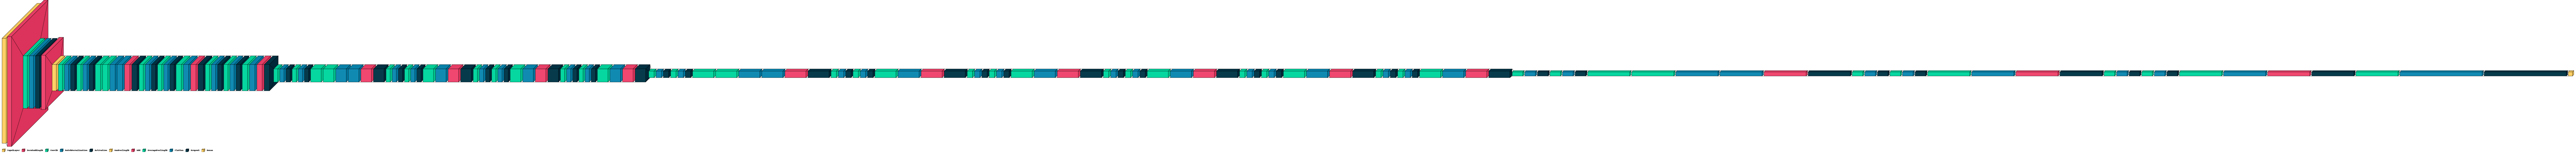

In [434]:
visualkeras.layered_view(history1, legend=True)

In [26]:
history1.evaluate(train_generator)
history1.evaluate(validation_generator)
history1.evaluate(test_generator)

95/95 [==============================] - 47s 487ms/step - loss: 0.4414 - categorical_accuracy: 0.8399


[0.4414403736591339, 0.8399471044540405]

In [26]:
from tensorflow.keras.models import Model

base_model = tf.keras.applications.InceptionV3(weights = 'imagenet', include_top=False,
                                                  input_shape=(IMG_SIZE,IMG_SIZE,3)) #aynı parametreleri uyguluyoruz
headmodel = base_model.output # giriş modelinin devamını getiriyoruz

#fc layer
headmodel = Flatten(name ='Flatten')(headmodel) # verileri hazır hale getirmek için normalize ediyoruz
headmodel = Dense(2048)(headmodel)
headmodel = Dense(3, activation = 'softmax')(headmodel) # 4 sınıfımız olduğu için son layer 4 katmanlı ve kategorik bir çalışma olduğu için softmax seçildi

model2 = Model(inputs = base_model.input, outputs = headmodel) # en son modelimiz tamamlandı

# birden fazla sınıfımız olduğu için kategorik sınıflandırma ve 'adam' tercih edildi
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

In [41]:
model2.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 63, 63, 32)   864         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_376 (Batch  (None, 63, 63, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [42]:
history2 = model2.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20)

Epoch 1/20
95/95 [==============================] - 164s 2s/step - loss: 4.2351 - categorical_accuracy: 0.6270 - val_loss: 10.6375 - val_categorical_accuracy: 0.4742
Epoch 2/20
95/95 [==============================] - 143s 2s/step - loss: 0.8794 - categorical_accuracy: 0.7619 - val_loss: 4.1059 - val_categorical_accuracy: 0.7110
Epoch 3/20
95/95 [==============================] - 148s 2s/step - loss: 0.6450 - categorical_accuracy: 0.8254 - val_loss: 0.8730 - val_categorical_accuracy: 0.8624
Epoch 4/20
95/95 [==============================] - 147s 2s/step - loss: 0.4804 - categorical_accuracy: 0.8565 - val_loss: 0.3443 - val_categorical_accuracy: 0.8968
Epoch 5/20
95/95 [==============================] - 145s 2s/step - loss: 0.4484 - categorical_accuracy: 0.8889 - val_loss: 0.5981 - val_categorical_accuracy: 0.8532
Epoch 6/20
95/95 [==============================] - 148s 2s/step - loss: 0.4953 - categorical_accuracy: 0.8479 - val_loss: 0.6550 - val_categorical_accuracy: 0.8274
Epoch 7/2

In [43]:
model2.save('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionV3')
np.save('HDA_InceptionV3.npy',history2.history)

INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionV3\assets


INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionV3\assets


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


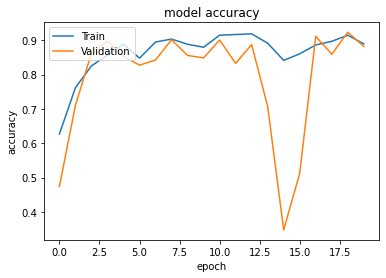

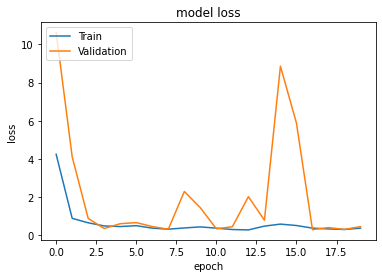

In [12]:
from matplotlib import pyplot as plt

history2 = keras.models.load_model('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models_CNN/InceptionV3')
hist2=np.load('HDA_InceptionV3.npy',allow_pickle='TRUE').item()
print(hist2.keys())

plt.plot(hist2['categorical_accuracy'])
plt.plot(hist2['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

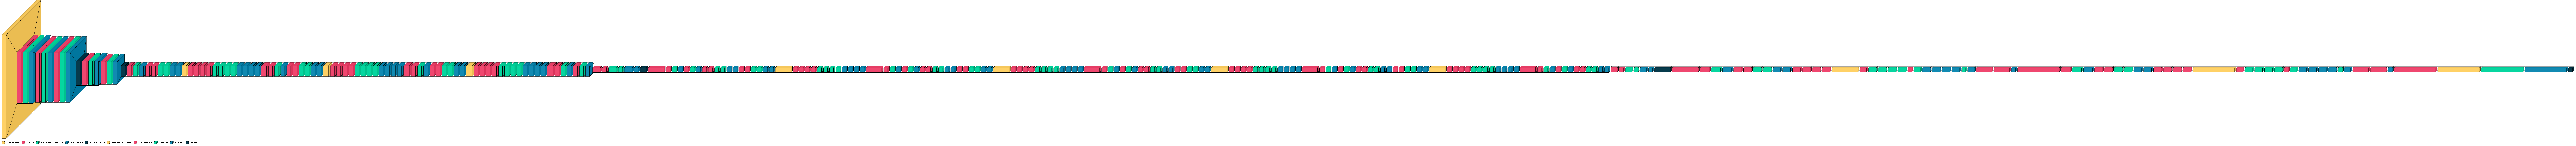

In [444]:
visualkeras.layered_view(history2, legend=True)

In [45]:
history2.evaluate(train_generator)
history2.evaluate(validation_generator)
history2.evaluate(test_generator)

95/95 [==============================] - 32s 337ms/step - loss: 0.5746 - categorical_accuracy: 0.8862


[0.5746239423751831, 0.8862434029579163]

In [27]:
base_model = tf.keras.applications.InceptionResNetV2(weights = 'imagenet', include_top=False,
                                                  input_shape=(IMG_SIZE,IMG_SIZE,3)) #aynı parametreleri uyguluyoruz
headmodel = base_model.output # giriş modelinin devamını getiriyoruz

#fc layer
headmodel = Flatten(name ='Flatten')(headmodel) # verileri hazır hale getirmek için normalize ediyoruz
headmodel = Dense(2048)(headmodel)
headmodel = Dense(3, activation = 'softmax')(headmodel) # 4 sınıfımız olduğu için son layer 4 katmanlı ve kategorik bir çalışma olduğu için softmax seçildi

model3 = Model(inputs = base_model.input, outputs = headmodel) # en son modelimiz tamamlandı

# birden fazla sınıfımız olduğu için kategorik sınıflandırma ve 'adam' tercih edildi
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

In [28]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [31]:
history3 = model3.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20)

Epoch 1/20
95/95 [==============================] - 302s 3s/step - loss: 1.6671 - categorical_accuracy: 0.6753 - val_loss: 10.6911 - val_categorical_accuracy: 0.5159
Epoch 2/20
95/95 [==============================] - 307s 3s/step - loss: 0.7684 - categorical_accuracy: 0.7983 - val_loss: 8.8219 - val_categorical_accuracy: 0.6944
Epoch 3/20
95/95 [==============================] - 305s 3s/step - loss: 0.5532 - categorical_accuracy: 0.8340 - val_loss: 0.6100 - val_categorical_accuracy: 0.8280
Epoch 4/20
95/95 [==============================] - 304s 3s/step - loss: 0.5910 - categorical_accuracy: 0.8360 - val_loss: 4.5705 - val_categorical_accuracy: 0.8313
Epoch 5/20
95/95 [==============================] - 303s 3s/step - loss: 0.8718 - categorical_accuracy: 0.8366 - val_loss: 0.7557 - val_categorical_accuracy: 0.8426
Epoch 6/20
95/95 [==============================] - 310s 3s/step - loss: 0.4889 - categorical_accuracy: 0.8565 - val_loss: 2.4949 - val_categorical_accuracy: 0.7209
Epoch 7/2

In [33]:
model3.save('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionResNetV2')
np.save('HDA_InceptionResNetV2.npy',history3.history)

INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionResNetV2\assets


INFO:tensorflow:Assets written to: C:/Users/Sinan/Desktop/Sinan/Padova/hda/models/InceptionResNetV2\assets


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


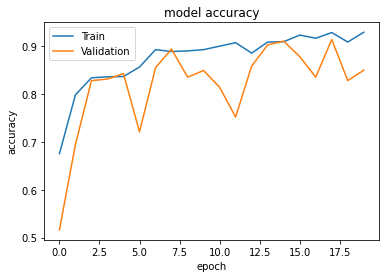

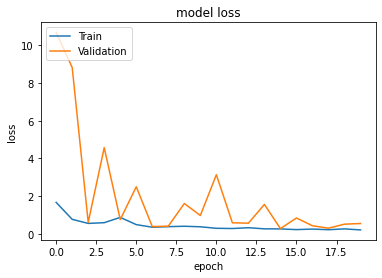

In [13]:
from matplotlib import pyplot as plt

history3 = keras.models.load_model('C:/Users/Sinan/Desktop/Sinan/Padova/hda/models_CNN/InceptionResNetV2')
hist3=np.load('HDA_InceptionResNetV2.npy',allow_pickle='TRUE').item()
print(hist3.keys())

plt.plot(hist3['categorical_accuracy'])
plt.plot(hist3['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

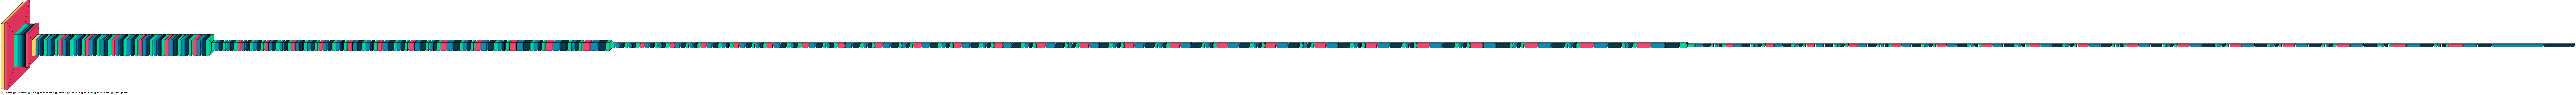

In [82]:
visualkeras.layered_view(history3, legend=True)

In [35]:
history3.evaluate(train_generator)
history3.evaluate(validation_generator)
history3.evaluate(test_generator)

95/95 [==============================] - 45s 469ms/step - loss: 0.5893 - categorical_accuracy: 0.8386


[0.5893400311470032, 0.8386243581771851]

SVM USING "ONE VS REST" & USE CNN Models As Feature Extractors and Train SVM Models with features 

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# in here we needed to create new data files using the same dataset with same ratio since we could not train svm with generators

import glob

train_images = [] # empty variable to fill with data
train_labels = [] 

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/train1/*"):
    #directory for tha dataset
    label = directory_path.split("\\")[-1] #label names are the subfile names
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")): #to find the images and with .jpg
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) # read the image with original colors      
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #resize the image
        train_images.append(img) #save each image to the variable
        train_labels.append(label) #save each class name to the variable

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/train1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")): #to find the images and with .png
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        train_images.append(img)
        train_labels.append(label)
        
for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/train1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")): #to find the images and with .jpeg
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        train_images.append(img)
        train_labels.append(label)

In [15]:
test_images = []
test_labels = [] 

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/test1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/test1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)
        
for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/test1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

In [16]:
validation_images = []
validation_labels = [] 

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/validation1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        validation_images.append(img)
        validation_labels.append(label)

for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/validation1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        validation_images.append(img)
        validation_labels.append(label)
        
for directory_path in glob.glob("C:/Users/Sinan/Desktop/Sinan/Padova/hda/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/validation1/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        validation_images.append(img)
        validation_labels.append(label)

In [17]:
print(np.shape(train_labels))

(1512,)


In [18]:
train_images = np.array(train_images) #convert the datasets into numpy array to train svm
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

print(np.shape(train_images))
print(np.shape(test_images))
print(np.shape(validation_images))

(1512, 128, 128, 3)
(1512, 128, 128, 3)
(1512, 128, 128, 3)


In [19]:
#in order to have trainable data (by svm) we needed to reduce the dimensions from 3d to 1d

train_images1 = train_images.reshape(train_images.shape[0], -1)
test_images1 = test_images.reshape(test_images.shape[0], -1)
validation_images1 = validation_images.reshape(validation_images.shape[0], -1)

print(np.shape(train_images1))
print(np.shape(test_images1))
print(np.shape(validation_images1))

(1512, 49152)
(1512, 49152)
(1512, 49152)


In [20]:
#here we extract the weights of cnn models as a feature map

for layer in model.layers:
    layer.trainable = False #trainable to False moves all the layer's weights from trainable to non-trainable
    
feature_extractor=model.predict(train_images) #custom cnn, pretrain the model

feature_extractor = feature_extractor.reshape(feature_extractor.shape[0], -1) #extract the weights
print(np.shape(feature_extractor))

48/48 [==============================] - 19s 381ms/step
(1512, 3)


In [28]:
for layer in model0.layers:
    layer.trainable = False
    
feature_extractor0=model0.predict(train_images) #attention cnn

feature_extractor0 = feature_extractor0.reshape(feature_extractor0.shape[0], -1)
print(np.shape(feature_extractor0))

48/48 [==============================] - 19s 394ms/step
(1512, 3)


In [29]:
from keras.applications import ResNet50

model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)) 
# we needed to call the dummy-trained models and pretrain with imagenet before 

for layer in model1.layers:
    layer.trainable = False
    
feature_extractor1=model1.predict(train_images) #ResNet50

feature_extractor1 = feature_extractor1.reshape(feature_extractor1.shape[0], -1)
print(np.shape(feature_extractor1))

48/48 [==============================] - 25s 512ms/step
(1512, 32768)


In [30]:
from keras.applications import InceptionV3

model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in model2.layers:
    layer.trainable = False
    
feature_extractor2=model2.predict(train_images) #InceptionV3

feature_extractor2 = feature_extractor2.reshape(feature_extractor2.shape[0], -1)
print(np.shape(feature_extractor2))

48/48 [==============================] - 12s 222ms/step
(1512, 8192)


In [31]:
from keras.applications import InceptionResNetV2

model3 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in model3.layers:
    layer.trainable = False
    
feature_extractor3=model3.predict(train_images) #InceptionResNetV2

feature_extractor3 = feature_extractor3.reshape(feature_extractor3.shape[0], -1)
print(np.shape(feature_extractor3))

48/48 [==============================] - 28s 532ms/step
(1512, 6144)


In [32]:
from sklearn import svm

In [38]:
svm_normal = svm.SVC() #ordinary svm model (linear svm would be confusing since the data has 3 classes)
svm_normal.fit(train_images1, train_labels) #train the model

SVC()

In [39]:
print("Training Score of SVM:", svm_normal.score(train_images1, train_labels)) #evaluate the scores
print("Testing Score of SVM:", svm_normal.score(test_images1, test_labels))
print("Validation Score of SVM:", svm_normal.score(validation_images1, validation_labels))

Training Score of SVM: 0.9279100529100529
Testing Score of SVM: 0.8809523809523809
Validation Score of SVM: 0.878968253968254


In [40]:
svm_cnn = svm.SVC()
svm_cnn.fit(feature_extractor, train_labels)

SVC()

In [41]:
print("Training Score of CNN-SVM:", svm_cnn.score(feature_extractor, train_labels))
print("Testing Score of CNN-SVM:", svm_cnn.score(feature_extractor, test_labels))
print("Validation Score CNN-SVM:", svm_cnn.score(feature_extractor, validation_labels))

Training Score of CNN-SVM: 0.5529100529100529
Testing Score of CNN-SVM: 0.5462962962962963
Validation Score CNN-SVM: 0.546957671957672


In [42]:
svm_attention = svm.SVC()
svm_attention.fit(feature_extractor0, train_labels)

SVC()

In [43]:
print("Training Score of Attention-SVM:", svm_attention.score(feature_extractor0, train_labels))
print("Testing Score of Attention-SVM:", svm_attention.score(feature_extractor0, test_labels))
print("Validation Score Attention-SVM:", svm_attention.score(feature_extractor0, validation_labels))

Training Score of Attention-SVM: 0.5112433862433863
Testing Score of Attention-SVM: 0.5052910052910053
Validation Score Attention-SVM: 0.5066137566137566


In [44]:
svm_ResNet50 = svm.SVC()
svm_ResNet50.fit(feature_extractor1, train_labels)

SVC()

In [45]:
print("Training Score of ResNet50-SVM:", svm_ResNet50.score(feature_extractor1, train_labels))
print("Testing Score of ResNet50-SVM:", svm_ResNet50.score(feature_extractor1, test_labels))
print("Validation Score of ResNet50-SVM:", svm_ResNet50.score(feature_extractor1, validation_labels))

Training Score of ResNet50-SVM: 0.968915343915344
Testing Score of ResNet50-SVM: 0.9537037037037037
Validation Score of ResNet50-SVM: 0.955026455026455


In [46]:
svm_InceptionV3 = svm.SVC()
svm_InceptionV3.fit(feature_extractor2, train_labels)

SVC()

In [47]:
print("Training Score of InceptionV3-SVM:", svm_InceptionV3.score(feature_extractor2, train_labels))
print("Testing Score of InceptionV3-SVM:", svm_InceptionV3.score(feature_extractor2, test_labels))
print("Validation Score of InceptionV3-SVM:", svm_InceptionV3.score(feature_extractor2, validation_labels))

Training Score of InceptionV3-SVM: 0.8902116402116402
Testing Score of InceptionV3-SVM: 0.876984126984127
Validation Score of InceptionV3-SVM: 0.8809523809523809


In [48]:
svm_InceptionResNetV2 = svm.SVC()
svm_InceptionResNetV2.fit(feature_extractor3, train_labels)

SVC()

In [49]:
print("Training Score of InceptionResNetV2-SVM:", svm_InceptionResNetV2.score(feature_extractor3, train_labels))
print("Testing Score of InceptionResNetV2-SVM:", svm_InceptionResNetV2.score(feature_extractor3, test_labels))
print("Validation Score of InceptionResNetV2-SVM:", svm_InceptionResNetV2.score(feature_extractor3, validation_labels))

Training Score of InceptionResNetV2-SVM: 0.6626984126984127
Testing Score of InceptionResNetV2-SVM: 0.6593915343915344
Validation Score of InceptionResNetV2-SVM: 0.6626984126984127


In [33]:
import pickle

In [55]:
filename = 'HDA_svm_normal.sav' #save the model as an array
pickle.dump(svm_normal, open(filename, 'wb')) #re-download the model to try to evaluate again

filename1 = 'HDA_svm_cnn.sav'
pickle.dump(svm_cnn, open(filename1, 'wb'))

filename2 = 'HDA_svm_attention.sav'
pickle.dump(svm_attention, open(filename2, 'wb'))

filename3 = 'HDA_svm_ResNet50.sav'
pickle.dump(svm_ResNet50, open(filename3, 'wb'))

filename4 = 'HDA_svm_InceptionV3.sav'
pickle.dump(svm_InceptionV3, open(filename4, 'wb'))

filename5 = 'HDA_svm_InceptionResNetV2.sav'
pickle.dump(svm_InceptionResNetV2, open(filename5, 'wb'))

In [35]:
# load the model from disk
loaded_model = pickle.load(open('HDA_svm_normal.sav', 'rb'))
print('Results for svm_normal')
result = loaded_model.score(train_images1, train_labels)
print(result)
result = loaded_model.score(test_images1, test_labels)
print(result)
result = loaded_model.score(validation_images1, validation_labels)
print(result)
print('###############')

# load the model from disk
loaded_model = pickle.load(open('HDA_svm_ResNet50.sav', 'rb'))
print('Results for svm_resnet')
result = loaded_model.score(feature_extractor1, train_labels)
print(result)
result = loaded_model.score(feature_extractor1, test_labels)
print(result)
result = loaded_model.score(feature_extractor1, validation_labels)
print(result)
print('###############')

# load the model from disk
loaded_model = pickle.load(open('HDA_svm_InceptionV3.sav', 'rb'))
print('Results for svm_inceptionv3')
result = loaded_model.score(feature_extractor2, train_labels)
print(result)
result = loaded_model.score(feature_extractor2, test_labels)
print(result)
result = loaded_model.score(feature_extractor2, validation_labels)
print(result)
print('###############')

# load the model from disk
loaded_model = pickle.load(open('HDA_svm_InceptionResNetV2.sav', 'rb'))
print('Results for svm_inceptionresnetv2')
result = loaded_model.score(feature_extractor3, train_labels)
print(result)
result = loaded_model.score(feature_extractor3, test_labels)
print(result)
result = loaded_model.score(feature_extractor3, validation_labels)
print(result)

Results for svm_normal
0.9272486772486772
0.8809523809523809
0.878968253968254
###############
Results for svm_resnet
0.968915343915344
0.9537037037037037
0.955026455026455
###############
Results for svm_inceptionv3
0.8895502645502645
0.8763227513227513
0.8802910052910053
###############
Results for svm_inceptionresnetv2
0.6646825396825397
0.6613756613756614
0.6646825396825397
